# DESAFIO FINAL BOOTCAMP MACHINE LEARNING IGTI
## POR: Cairo Rocha

### 1. Carregar bibliotecas e dados 

In [70]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [71]:
train = pd.read_csv('/content/drive/My Drive/desafioigti/cars.csv')
train.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


### 2. Pré-processamento

In [72]:
train.isna().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [74]:
train['brand'].unique()

array([' US.', ' Europe.', ' Japan.'], dtype=object)

In [75]:
train['cubicinches'].unique()

array(['350', '89', '302', '400', '98', '351', '440', '183', '108', '97',
       '225', '85', '304', '113', '107', '86', '121', '200', '91', '71',
       '250', '120', '199', '231', '80', '232', ' ', '455', '318', '122',
       '141', '340', '116', '156', '90', '360', '168', '305', '198',
       '112', '119', '262', '134', '429', '115', '72', '105', '151', '88',
       '307', '101', '79', '140', '114', '173', '144', '81', '267', '70',
       '163', '171', '260', '131', '68', '96', '135', '390', '146', '258',
       '83', '76', '383', '130', '110', '454'], dtype=object)

In [76]:
train[train['cubicinches']==' ']['cubicinches'].count()

2

In [77]:
train['weightlbs'].unique()

array(['4209', '1925', '3449', '3761', '2051', '3900', '4363', '4312',
       '3530', '2050', '2245', '2188', '4141', '3664', ' ', '4360',
       '2020', '3433', '2278', '2430', '2019', '2600', '3012', '4054',
       '1968', '1795', '1773', '4657', '3574', '2380', '2130', '3278',
       '2506', '1985', '3415', '1835', '2720', '3955', '3265', '3897',
       '4638', '3645', '3520', '3086', '2635', '3755', '2395', '1940',
       '3060', '4464', '3190', '3609', '2158', '4380', '4278', '2930',
       '2075', '1937', '3821', '2945', '2379', '2910', '2110', '4237',
       '3525', '1950', '1965', '1825', '3880', '3102', '2640', '2288',
       '2545', '2219', '3015', '3085', '2515', '2265', '2350', '4325',
       '4952', '3425', '2694', '2220', '1613', '2774', '3465', '2125',
       '1975', '2300', '4100', '3329', '2255', '3907', '4499', '3139',
       '3830', '3781', '4997', '4906', '2126', '2200', '2335', '2065',
       '2671', '3504', '2279', '2933', '4335', '3785', '2740', '3039',
       '2

In [78]:
train[train['weightlbs']==' ']['weightlbs'].count()

3

In [79]:
train[train['cubicinches']==' ']

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,,105,3897,19,1976,US.
180,19.8,6,,85,2990,18,1980,US.


In [80]:
train['cubicinches'] = pd.to_numeric(train['cubicinches'], errors='coerce')
train['weightlbs'] = pd.to_numeric(train['weightlbs'], errors='coerce')
train.isna().sum().sum()

5

In [81]:
train['cubicinches'].fillna(train['cubicinches'].mean(), inplace=True)
train['weightlbs'].fillna(train['weightlbs'].mean(), inplace=True)
train['weightlbs'].isna().sum()


0

In [82]:
train['brand'] = train['brand'].replace({' US.':0, ' Europe.':1, ' Japan.':2})

In [83]:
train = train[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']]

In [84]:
train['mpg'].median()

22.0

In [85]:
train['time-to-60'].describe()

count    261.000000
mean      15.547893
std        2.910625
min        8.000000
25%       14.000000
50%       16.000000
75%       17.000000
max       25.000000
Name: time-to-60, dtype: float64

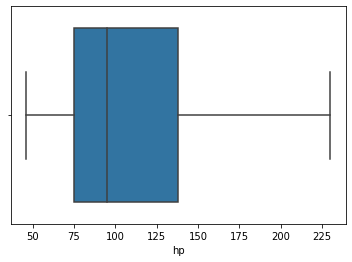

In [86]:
sns.boxplot(train['hp']) #ERRADO: Cada um dos quartis possui a mesma quantidade de valores para a variável “hp”.

In [87]:
train[['cylinders','mpg']].corr()

,cylinders,mpg
cylinders,1.00000,-0.77671
mpg,-0.77671,1.00000


In [88]:
Y = np.where(train['mpg']>25, 1, 0) #Na questão pede pra fazer depois do processamento, mas não existe mais valor > 25

In [89]:
cols = train.columns
ss = StandardScaler()
X = ss.fit_transform(train)
X = pd.DataFrame(X, columns=cols)

In [90]:
X['hp'].max() # NÃO EXISTE RESPOSTA

3.05870398977614

In [91]:
X.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02
mean,3.143505e-16,2.124737e-16,-1.203805e-16,9.831429e-17,-1.648320e-16,-2.043916e-16,-2.605329e-15
std,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00,1.001921e+00
min,-1.683385e+00,-1.497144e+00,-1.223609e+00,-1.493239e+00,-1.648240e+00,-2.598203e+00,-1.602966e+00
25%,-7.997404e-01,-9.191048e-01,-9.198217e-01,-7.758132e-01,-8.918710e-01,-5.328295e-01,-7.766842e-01
50%,-1.466117e-01,2.369740e-01,-4.135093e-01,-2.810368e-01,-1.248816e-01,1.556284e-01,4.959804e-02
75%,7.242265e-01,1.393053e+00,9.305202e-01,7.827325e-01,7.719060e-01,4.998573e-01,8.758803e-01
max,3.003774e+00,1.393053e+00,2.338990e+00,3.058704e+00,2.344824e+00,3.253689e+00,1.702163e+00


3. Aplicar os algoritmos 

In [92]:
pca =  PCA(n_components=7)
X = pca.fit_transform(X)
X = pd.DataFrame(X, columns=cols)

In [105]:
pca.explained_variance_ratio_[0]

0.7237134885896341

In [94]:
km = KMeans(n_clusters=3,random_state=42)
clusters = km.fit_predict(X)

In [95]:
km.cluster_centers_

array([[-2.21903474e-01,  3.35880334e-01,  2.83961966e-01,
        -2.67686215e-01, -5.45225710e-02, -4.15058549e-03,
         6.49104031e-03],
       [-2.21966813e+00, -1.65114484e-01, -1.97903173e-01,
         1.41526756e-01,  5.21847434e-02, -6.14922939e-03,
        -2.61748230e-02],
       [ 3.08082252e+00, -1.98389792e-01, -9.38631667e-02,
         1.45525382e-01,  5.33778892e-05,  1.28250676e-02,
         2.52789802e-02]])

In [96]:
pd.Series(clusters).value_counts()

1    95
0    91
2    75
dtype: int64

In [97]:
X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=42)

In [98]:
model1 = LogisticRegression(random_state=42)
model1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.97      0.97      0.97        38

    accuracy                           0.97        79
   macro avg       0.97      0.97      0.97        79
weighted avg       0.97      0.97      0.97        79



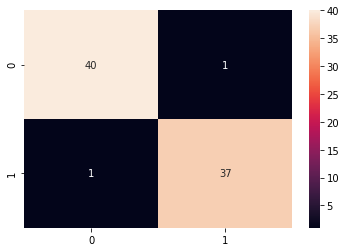

In [100]:
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True)

In [101]:
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [102]:
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.95      0.95      0.95        38

    accuracy                           0.95        79
   macro avg       0.95      0.95      0.95        79
weighted avg       0.95      0.95      0.95        79



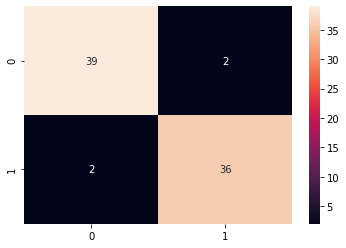

In [103]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True)

# Fim (The End)